### 1. Import required libraries and read the dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
app = pd.read_csv(r"C:\Users\91970\Downloads\Google_Apps_data.csv")

### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
app.sample() # It shows Random Sample

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1456,Houzz Interior Design Ideas,HOUSE_AND_HOME,4.6,353799,Varies with device,"10,000,000+",Free,0,Everyone,House & Home,"August 1, 2018",Varies with device,Varies with device


In [4]:
app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
app.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
app.shape

(10841, 13)

In [7]:
app.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [8]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# About Dataset

### 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.


In [9]:
app.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [10]:
app.describe(include = 'object')

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


### 4. Check if there are any duplicate records in the dataset? if any drop them.


In [11]:
app.duplicated() # It gives Boolean values result

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10841, dtype: bool

In [12]:
app.duplicated().sum() # 483 Duplicate Records were found

483

In [13]:
app.drop_duplicates(keep = 'first', inplace = True) # Dropped the duplicate records

In [14]:
app.duplicated().sum()

0

### 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.


In [15]:
list(app['Category'].unique()) # pd.unique(app['category']) ## Checking Unique values

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FINANCE',
 'FOOD_AND_DRINK',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'GAME',
 'FAMILY',
 'MEDICAL',
 'SOCIAL',
 'SHOPPING',
 'PHOTOGRAPHY',
 'SPORTS',
 'TRAVEL_AND_LOCAL',
 'TOOLS',
 'PERSONALIZATION',
 'PRODUCTIVITY',
 'PARENTING',
 'WEATHER',
 'VIDEO_PLAYERS',
 'NEWS_AND_MAGAZINES',
 'MAPS_AND_NAVIGATION',
 '1.9']

There is a value 1.9 which is a invalid so we can drop it

In [16]:
app1 = app.copy() # Copying the dataset into another variable

In [17]:
app1 = app[app['Category']!='1.9'] # Removing the '1.9' Data

In [18]:
list(pd.unique(app['Category']))

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FINANCE',
 'FOOD_AND_DRINK',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'GAME',
 'FAMILY',
 'MEDICAL',
 'SOCIAL',
 'SHOPPING',
 'PHOTOGRAPHY',
 'SPORTS',
 'TRAVEL_AND_LOCAL',
 'TOOLS',
 'PERSONALIZATION',
 'PRODUCTIVITY',
 'PARENTING',
 'WEATHER',
 'VIDEO_PLAYERS',
 'NEWS_AND_MAGAZINES',
 'MAPS_AND_NAVIGATION',
 '1.9']

### 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [19]:
app1['Rating'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838     True
10839    False
10840    False
Name: Rating, Length: 10357, dtype: bool

In [20]:
app1['Rating'].isnull().sum() # Count of Null values

1465

In [21]:
app2 = app1.copy() # Creating the copy

In [22]:
app2.dropna(subset = 'Rating', inplace = True) # Removed the missing values

In [23]:
app2['Rating'].isnull().sum()

0

In [24]:
def Rating_category(a):
    if a > 3.5:
        return "High"
    else:
        return 'Low'

In [25]:
app2[['Rating_category']]=np.nan

In [26]:
app2['Rating_category'] = app2['Rating'].map(Rating_category)

In [27]:
app2[['Rating','Rating_category']].sample(4)

,Rating,Rating_category
10814,4.0,High
4655,4.0,High
2662,4.4,High
6100,3.9,High


### 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

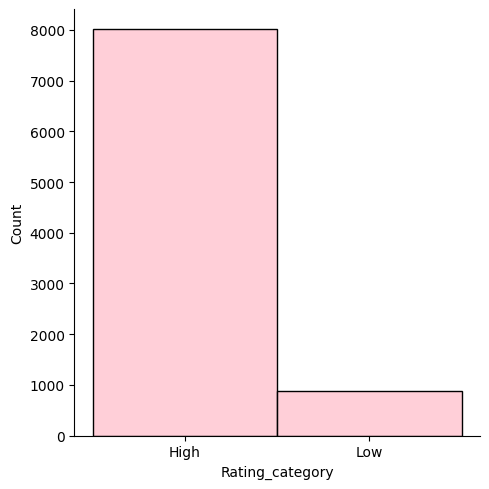

In [28]:
sns.displot(data=app2, x='Rating_category', color = 'pink')

* There are nearly 8000 apps with High Ratings (>3.5)
* There are around 1000 apps with low Ratings (<3.5)

### 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [29]:
app2['Reviews'] = app2['Reviews'].astype(int)

In [30]:
app2.dtypes

App                 object
Category            object
Rating             float64
Reviews              int32
Size                object
Installs            object
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Rating_category     object
dtype: object

<AxesSubplot: xlabel='Reviews'>

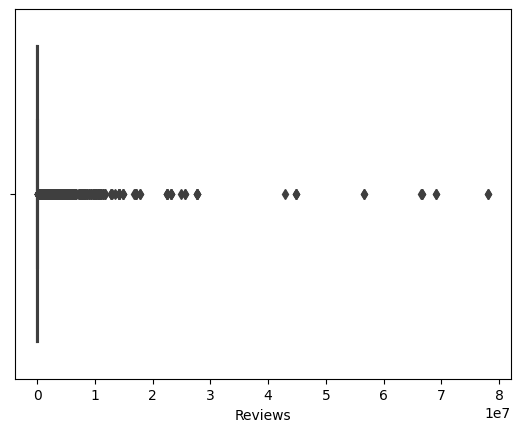

In [31]:
sns.boxplot(data=app2, x='Reviews')

In [ ]:
log_t=FunctionTransformer(np.log1p)
app2['Reviews']=pd.DataFrame(log_t.fit_transform(app2[['Reviews']]))

### 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [32]:
app2[['Size']].sample(5)

,Size
10024,16M
8920,9.8M
339,Varies with device
1919,60M
2707,6.1M


In [33]:
app2['Size']=app2['Size'].str.replace('k','000')
app2['Size']=app2['Size'].str.replace('M','000000')

In [34]:
app2=app2[app2['Size']!='Varies with device']

In [35]:
app2['Size']=app2['Size'].astype(float)

In [36]:
app2['Size'].dtype

dtype('float64')

### 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [37]:
app2[['Installs']].sample(3)

,Installs
5699,"5,000+"
1654,"1,000,000,000+"
10116,"100,000+"


In [38]:
app2['Installs']=app2['Installs'].str.replace('+', '', regex=True)
app2['Installs']=app2['Installs'].str.replace(',','', regex=True)

In [39]:
app2['Installs']=app2['Installs'].astype(int)

In [40]:
app2['Installs'].dtype

dtype('int32')

### 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type

In [41]:
app2[['Price']].sample(5)

,Price
6025,0
9427,0
5726,0
7127,0
8265,0


In [42]:
app2['Price']=app2['Price'].str.replace('$','', regex =True)

In [43]:
app2['Price']=app2['Price'].astype(float)

In [44]:
app2['Price'].dtype

dtype('float64')

### 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [45]:
app2.drop(['App','Rating','Genres','Last Updated','Current Ver','Android Ver'], axis=1, inplace = True)

In [46]:
app2.columns

Index(['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Rating_category'],
      dtype='object')

### 13. Encode the categorical columns.

In [47]:
app2.dtypes

Category            object
Reviews              int32
Size               float64
Installs             int32
Type                object
Price              float64
Content Rating      object
Rating_category     object
dtype: object

In [48]:
app2['Category'].nunique()

33

In [49]:
app2['Content Rating'].nunique()

6

In [50]:
app2['Rating_category'].nunique()

2

In [51]:
le=LabelEncoder()

In [52]:
app2['Category']=le.fit_transform(app2['Category'])

In [53]:
app2['Category'].sample(5)

9117     11
1050     12
6371     13
8088     14
10752    12
Name: Category, dtype: int32

In [54]:
app2['Content Rating']=le.fit_transform(app2['Content Rating'])

In [55]:
app2['Content Rating'].sample(5)

9325     1
10125    1
8978     1
1766     1
1060     1
Name: Content Rating, dtype: int32

In [56]:
app2['Rating_category']=le.fit_transform(app2['Rating_category'])

In [57]:
app2['Rating_category'].sample(5)

1217    1
3864    0
6299    0
4305    0
2686    0
Name: Rating_category, dtype: int32

In [58]:
app2['Type'].nunique()

2

In [59]:
app2['Type']=le.fit_transform(app2['Type'])

In [60]:
app2['Type'].sample(5)

3898    0
9088    0
2379    0
994     0
9358    0
Name: Type, dtype: int32

### 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [61]:
a=app2.drop('Rating_category', axis = 1)

In [62]:
b=app2['Rating_category']
b

0        0
1        0
2        0
3        0
4        0
        ..
10833    0
10834    0
10836    0
10837    0
10840    0
Name: Rating_category, Length: 7424, dtype: int32

In [63]:
a.sample(5)

,Category,Reviews,Size,Installs,Type,Price,Content Rating
2023,11,12948,23000000.0,1000000,0,0.0,1
4145,14,3697174,36000000.0,50000000,0,0.0,4
7771,23,323,38000000.0,10000,0,0.0,1
7718,11,59152,50000000.0,1000000,0,0.0,2
4213,11,681,2.8,50000,0,0.0,1


In [64]:
b.sample(5)

6088    1
4027    0
5622    0
4931    0
7320    0
Name: Rating_category, dtype: int32

### 15. Split the dataset into train and test.

In [65]:
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.30,random_state=900)

In [66]:
len(a_train)

5196

In [67]:
len(a_test)

2228

### 16. Standardize the data, so that the values are within a particular range.

In [68]:
app2.sample(3)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
6042,29,533,7.3,100000,0,0.0,1,0
6390,11,150,5.9,10000,0,0.0,1,0
4947,29,1586,1.5,500000,0,0.0,1,0


In [69]:
mms=MinMaxScaler()

In [70]:
a_train=pd.DataFrame(mms.fit_transform(a_train))

In [71]:
a_test=pd.DataFrame(mms.transform(a_test))

* We have Normalized the data
* Now the range of values lie within a particular range
* Range of values in data is 0 and 1